In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

sns.set(style="whitegrid")
%matplotlib inline 

In [3]:
df = pd.read_csv('./StudentsPerformance.csv')

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [18]:
grouped = df['gender'].value_counts().reset_index()
grouped = grouped.rename(columns={ 'gender' : 'count', 'index': 'gender' })

In [19]:
grouped

,gender,count
0,female,518
1,male,482


In [24]:
col = "gender"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title=" Gender", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [34]:
col = 'race/ethnicity'

grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns={col: 'count', 'index': col})

# Plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], 
               pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))

layout = go.Layout(title=" race/ethnicity", height=600, legend=dict(x=0.1, y=1.1))

fig = go.Figure(data=[trace], layout= layout)
iplot(fig)

In [50]:
col = 'parental level of education'
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns={col: 'count', 'index': col})

## Plot
trace = go.Pie(
    labels=grouped[col],
    values=grouped['count'],
    pull=[0.05, 0],
    marker=dict(colors=["#6ad49f", "#a678de"])
)

layout = go.Layout(
    title=col,
    height=600,
    legend=dict(x=0.1, y=1)
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [52]:
col = 'lunch'

grouped = df[col].value_counts().reset_index().rename(columns={col: 'count', 'index': col})

## Plot
trace = go.Pie(
    labels=grouped[col],
    values=grouped['count'],
    pull=[0.05, 0],
    marker=dict(colors=["#6ad49f", "#a678de"])
)

layout = go.Layout(
    title=col,
    height=600,
    legend=dict(x=0.1, y=1)
)

fig = go.Figure(layout=layout, data=[trace])
iplot(fig)

In [54]:
def piePlot(col):
    grouped = df[col].value_counts().reset_index().rename(columns={col: 'count', 'index': col})

    ## Plot
    trace = go.Pie(
        labels=grouped[col],
        values=grouped['count'],
        pull=[0.05, 0],
        marker=dict(colors=["#6ad49f", "#a678de"])
    )

    layout = go.Layout(
        title=col,
        height=600,
        legend=dict(x=0.1, y=1)
    )

    fig = go.Figure(layout=layout, data=[trace])
    iplot(fig)
    
piePlot(col='test preparation course')

<AxesSubplot:xlabel='math score', ylabel='Density'>

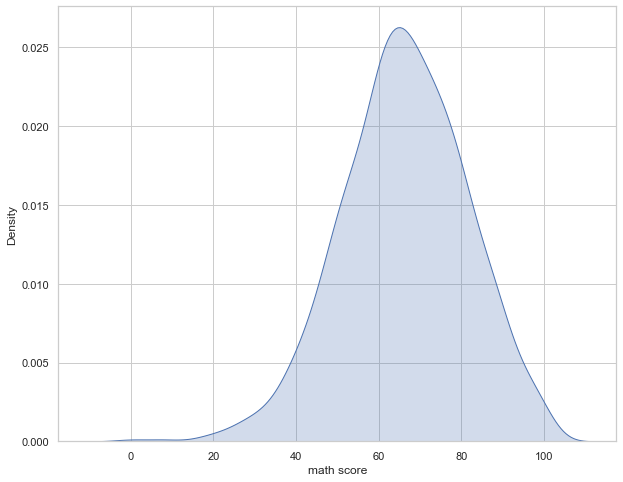

In [58]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['math score'], fill=True)

<AxesSubplot:xlabel='reading score', ylabel='Density'>

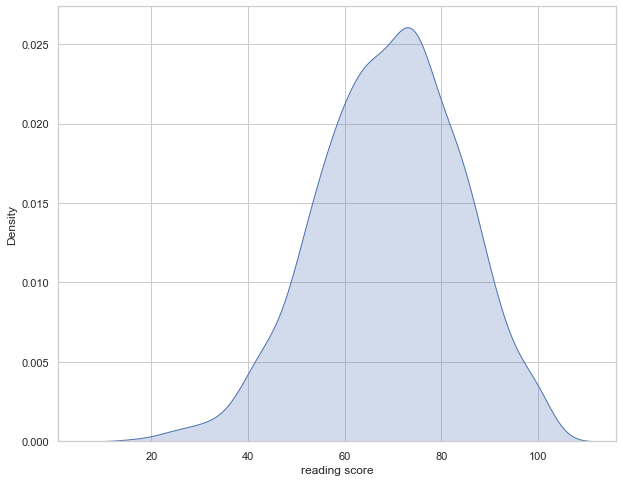

In [59]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['reading score'], fill=True)

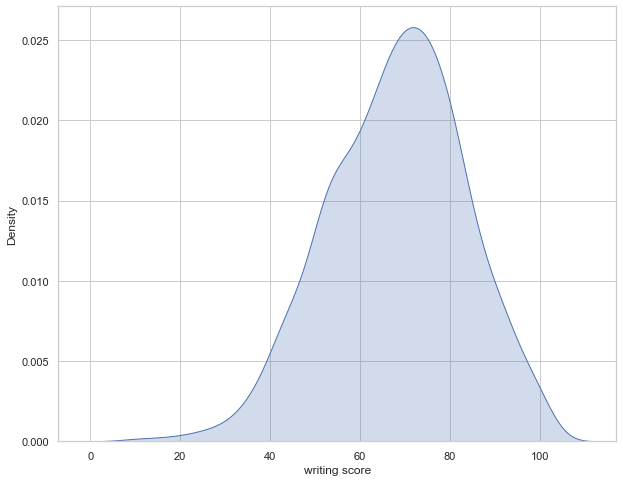

In [60]:
def plotKde(col):
    plt.figure(figsize=(10,8))
    sns.kdeplot(df[col], fill=True)
    
plotKde('writing score')

## Missing vlaues check 

In [61]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Perfect Dataset

# Predicting the score

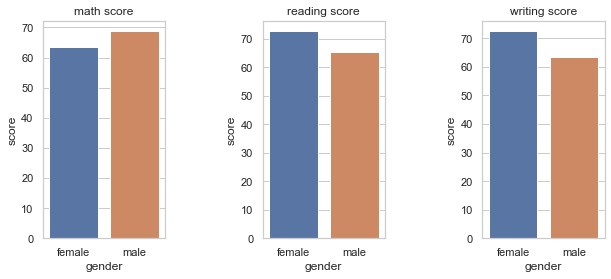

In [97]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(x=gender_df.index, y=gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    

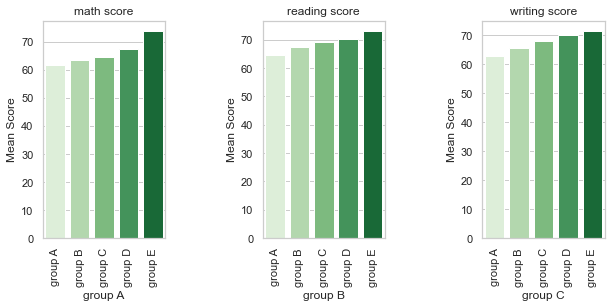

In [111]:
col = 'race/ethnicity'
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3): 
    plt.subplot(1,3, idx+1)
    enth_df = df.groupby(col)[list(df.columns[-3:]) [idx]].describe()
    sns.barplot(x=enth_df.index, y=enth_df.loc[:, 'mean'].values , palette = "Greens")
    plt.ylabel('Mean Score')
    plt.xlabel(enth_df.index[idx])
    plt.xticks(rotation=90)
    plt.title(df.columns[-3:][idx])

**Relation between test preparation course and the three exams**

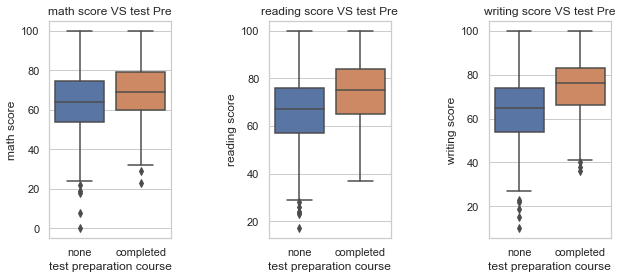

In [121]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
idx = 1
for col in df.columns[-3:]:
    plt.subplot(1, 3, idx)
    sns.boxplot(y = df[col], x = df['test preparation course'])
    plt.title(col + ' VS test Pre' )
    idx = idx + 1

**Relation between `lunch` and `Test Preparation course`**

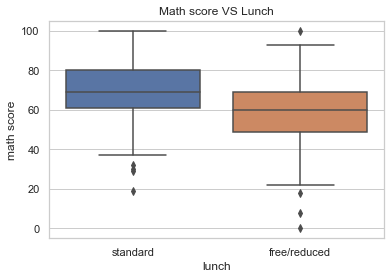

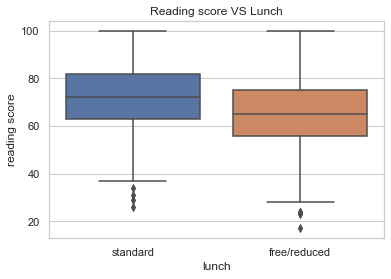

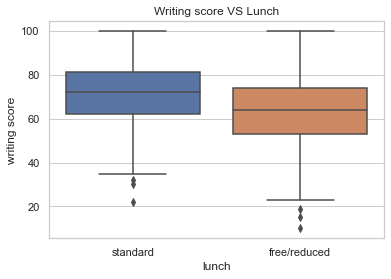

In [125]:
for col in df.columns[-3:]:
    sns.boxplot(x = df['lunch'], y = df[col])
    plt.title(col.capitalize() + " VS Lunch")
    plt.show()

## Transform Data 

In [199]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_copy = df.copy()
df_copy['test preparation course'] = labelencoder.fit_transform(df_copy['test preparation course'])
df_copy['race/ethnicity'] = labelencoder.fit_transform(df_copy['race/ethnicity'])
df_copy['gender'] = labelencoder.fit_transform(df_copy['gender'])
df_copy['lunch'] = labelencoder.fit_transform(df_copy['lunch'])
df_copy['parental level of education'] = labelencoder.fit_transform(df_copy['parental level of education'])

In [200]:
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [201]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Prepare traning and test data

In [206]:
from sklearn.model_selection import train_test_split
x = df_copy.iloc[:, :-3]
y = df_copy.iloc[:, -3:]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [207]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
preds=model.predict(x_test)

In [208]:
model.score(x_train, y_train)

0.4268944372923573

In [209]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print("R_square score: ", r2_score(y_test,preds))

MAE: 11.642307571538785
MSE: 206.13547908062102
RMSE: 14.357418956087512
R_square score:  0.06907099829032304
